In [1]:
import numpy as np
import time
import os
from collections import namedtuple, deque

from unityagents import UnityEnvironment

from ddpg_agent import DDPG_Agent
from trainer_ddpg import train_ddpg

from agent_utils import plot_training_scores

import matplotlib.pyplot as plt
%matplotlib inline

SEED = 42
PATH_TO_ENV = 'Reacher_Windows_x86_64/Reacher.exe'

In [2]:
env = UnityEnvironment(file_name=PATH_TO_ENV)

# gather scenario information
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment and grab infos
env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]
train_mode = True

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# create parameters, anything omitted will take on the appropriate default value
# default_params contains the same values as the defaults, for reference
default_params = {
    'name':'default_ddpg',
    'buffer_size':int(1e6),
    'batch_size':128,
    'layers_actor':[128,128],
    'layers_critic':[128, 128],
    'lr_actor':1e-4,
    'lr_critic':3e-4,
    'gamma':0.99,
    'tau':1e-3,
    'weight_decay':0.0001
}

armoboto_params = {
    'name':'Agent Armoboto',
    'buffer_size':int(2e6),
    'batch_size':1024,
    'layers_actor':[256,256],
    'layers_critic':[256, 256],
    'lr_actor':1e-3,
    'lr_critic':1e-3,
    'gamma':0.99,
    'tau':1e-3,
    'weight_decay':0.0
}

In [4]:
# create the agent
agent = DDPG_Agent(state_size, action_size, brain_name, seed=SEED,
                  params=armoboto_params)
print(agent.display_params())

{'name': 'Agent Armoboto', 'buffer_size': 2000000, 'batch_size': 1024, 'layers_actor': [256, 256], 'layers_critic': [256, 256], 'lr_actor': 0.001, 'lr_critic': 0.001, 'gamma': 0.99, 'tau': 0.001, 'weight_decay': 0.0}


In [5]:
#train the agent
n_episodes = 120
max_t = 1000
print_every = 5

goal_score = 30
score_window_size = 100
keep_training = True

t_learn = 20
num_learn = 12

scores = train_ddpg(env, agent, num_agents,
                    n_episodes=n_episodes, 
                    max_t=max_t, 
                    print_every=print_every, 
                    goal_score=goal_score,
                    score_window_size=score_window_size,
                    t_learn=t_learn, 
                    num_learn=num_learn,
                    keep_training=keep_training)

Saved agent parameters at saved_agents/Agent Armoboto/

Training started for 'Agent Armoboto'...
Episode 1	Avg. Ep. Score: 0.68	Mean: 0.68	Min: 0.00	Max: 1.46	Time: 29.60
Episode 2	Avg. Ep. Score: 0.58	Mean: 0.48	Min: 0.00	Max: 0.92	Time: 29.94
Episode 3	Avg. Ep. Score: 0.59	Mean: 0.61	Min: 0.14	Max: 1.99	Time: 30.27
Episode 4	Avg. Ep. Score: 0.60	Mean: 0.62	Min: 0.03	Max: 1.93	Time: 30.53
Episode 5	Avg. Ep. Score: 0.62	Mean: 0.72	Min: 0.16	Max: 1.48	Time: 30.95
Episode 5	Average Score over 100 episodes: 0.62
Episode 6	Avg. Ep. Score: 0.70	Mean: 1.06	Min: 0.55	Max: 2.39	Time: 31.85
Episode 7	Avg. Ep. Score: 0.74	Mean: 0.97	Min: 0.38	Max: 2.02	Time: 31.79
Episode 8	Avg. Ep. Score: 0.84	Mean: 1.56	Min: 0.57	Max: 3.37	Time: 32.46
Episode 9	Avg. Ep. Score: 0.94	Mean: 1.77	Min: 0.61	Max: 3.40	Time: 33.95
Episode 10	Avg. Ep. Score: 1.04	Mean: 1.93	Min: 0.46	Max: 3.88	Time: 37.86
Episode 10	Average Score over 100 episodes: 1.04
Episode 11	Avg. Ep. Score: 1.13	Mean: 2.07	Min: 0.66	Max: 3.88	Ti

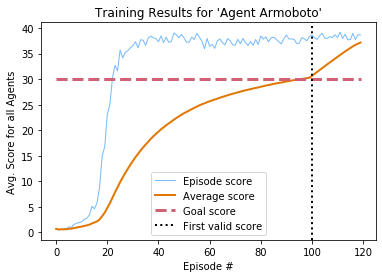

In [6]:
plot_training_scores(scores, goal_score, window=score_window_size,
                    ylabel='Avg. Score for all Agents',
                    agent_name=agent.name)

In [3]:
# demo a saved agent by loading it from disk
# uncomment the lines below to run demo

#from demos import demo_saved_agent_cont
#saved_agent_name = 'Agent Armoboto'
#demo_saved_agent_cont(env, saved_agent_name, n_episodes=1, seed=SEED)

Loaded agent parameters from saved_agents/Agent Armoboto/
{'name': 'Agent Armoboto', 'buffer_size': 2000000, 'batch_size': 1024, 'layers_actor': [256, 256], 'layers_critic': [256, 256], 'lr_actor': 0.001, 'lr_critic': 0.001, 'gamma': 0.99, 'tau': 0.001, 'weight_decay': 0.0}

Running demo of 'Agent Armoboto'
Episode 1	Mean: 38.69, Min: 36.99, Max: 39.57

Demo complete! Avg score: 38.691


In [4]:
# close the environment when done
env.close()